In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import WhatHappened as t2
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
df.shape
#num_rows = df.shape[0] #Provide the number of rows in the dataset
#num_cols = df.shape[1] #Provide the number of columns in the dataset

(19102, 154)

In [5]:
# A look at the data -- summary statistics
df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [6]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [7]:
df.dtypes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
cat_df = df.select_dtypes(include=['object','O']) 
cat_df.shape

(19102, 147)

In [11]:
set(cat_df)

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoder

In [11]:
Num_df=df.select_dtypes(include=['float64','int'])
Num_df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [13]:
set(Num_df)

{'CareerSatisfaction',
 'ExpectedSalary',
 'HoursPerWeek',
 'JobSatisfaction',
 'Respondent',
 'Salary',
 'StackOverflowSatisfaction'}

In [9]:
# A look at the data -- data value in feature
status_vals = df.CareerSatisfaction.value_counts()
status_vals 
#Provide a pandas series of the counts for each Professional status


8.0     4247
7.0     3624
9.0     2127
10.0    2053
6.0     1684
5.0     1132
4.0      481
3.0      376
2.0      177
0.0      136
1.0       65
Name: CareerSatisfaction, dtype: int64

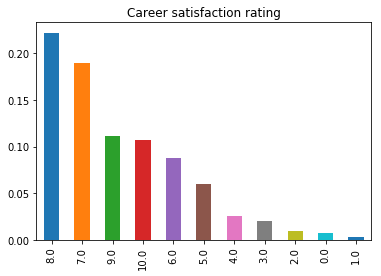

In [12]:
# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Career satisfaction rating");

In [11]:
df1[df1['Column']=='CareerSatisfaction']['Question']


18    Career satisfaction rating
Name: Question, dtype: object

In [15]:
most_missing_cols=df['CareerSatisfaction'].isnull().mean() > 0.5#Provide a set of columns with more than 75% of the values missing

most_missing_cols

False

In [20]:
no_nulls =df['CareerSatisfaction'].isnull().sum() #Provide a set of columns with 0 missing values.
no_nulls

3000

In [28]:
#---Proportion of individuals in the dataset with career satisfaction reported
prop_sals = 1 - df.isnull()['CareerSatisfaction'].mean()

prop_sals

0.84294838236833836

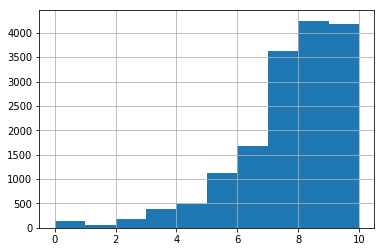

In [22]:
# A picture can often tell us more than numbers
df['CareerSatisfaction'].hist()


In [23]:
df['CareerSatisfaction'].describe().reset_index()

count    16102.000000
mean         7.343932
std          1.919330
min          0.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: CareerSatisfaction, dtype: float64

In [25]:
set(schema[schema['Column']=='CareerSatisfaction']['Question'])


{'Career satisfaction rating'}

In [11]:
# Using statistics to answer questions and draw insight
df['CareerSatisfaction'].isnull().mean()

0.15705161763166162

In [18]:
df.groupby(['FormalEducation','EmploymentStatus','YearsCodedJob','CompanySize']).mean()['CareerSatisfaction'].reset_index()

,FormalEducation,EmploymentStatus,YearsCodedJob,CompanySize,CareerSatisfaction
0,Bachelor's degree,Employed full-time,1 to 2 years,"1,000 to 4,999 employees",7.476190
1,Bachelor's degree,Employed full-time,1 to 2 years,10 to 19 employees,7.161290
2,Bachelor's degree,Employed full-time,1 to 2 years,"10,000 or more employees",6.943925
3,Bachelor's degree,Employed full-time,1 to 2 years,100 to 499 employees,7.261905
4,Bachelor's degree,Employed full-time,1 to 2 years,20 to 99 employees,7.362745
5,Bachelor's degree,Employed full-time,1 to 2 years,"5,000 to 9,999 employees",7.120000
6,Bachelor's degree,Employed full-time,1 to 2 years,500 to 999 employees,7.519231
7,Bachelor's degree,Employed full-time,1 to 2 years,Fewer than 10 employees,6.831325
8,Bachelor's degree,Employed full-time,1 to 2 years,I don't know,6.500000
9,Bachelor's degree,Employed full-time,1 to 2 years,I prefer not to answer,8.000000


In [19]:
# Using statistics to answer questions and draw insight
df.groupby(['EmploymentStatus']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,EmploymentStatus,CareerSatisfaction
0,"Not employed, but looking for work",5.020067
1,"Not employed, and not looking for work",6.715976
2,I prefer not to say,6.747967
3,Employed part-time,7.162011
4,Employed full-time,7.408127
5,"Independent contractor, freelancer, or self-em...",7.417947
6,Retired,8.153846


In [20]:
# Using statistics to answer questions and draw insight
df.groupby(['YearsCodedJob']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,YearsCodedJob,CareerSatisfaction
0,Less than a year,6.976789
1,1 to 2 years,7.193828
2,2 to 3 years,7.324698
3,4 to 5 years,7.330261
4,13 to 14 years,7.331878
5,3 to 4 years,7.369400
6,19 to 20 years,7.392857
7,9 to 10 years,7.397933
8,18 to 19 years,7.398551
9,5 to 6 years,7.424215


In [21]:
# Using statistics to answer questions and draw insight
df.groupby(['CompanySize']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,CompanySize,JobSatisfaction
0,"10,000 or more employees",6.793617
1,"5,000 to 9,999 employees",6.832155
2,"1,000 to 4,999 employees",6.908506
3,20 to 99 employees,6.997039
4,Fewer than 10 employees,7.025719
5,100 to 499 employees,7.029324
6,500 to 999 employees,7.029967
7,10 to 19 employees,7.035739
8,I don't know,7.054622
9,I prefer not to answer,7.284946


In [22]:
df.groupby(['FormalEducation']).mean()['CareerSatisfaction'].sort_values().dropna().reset_index()

,FormalEducation,JobSatisfaction
0,Bachelor's degree,6.900293
1,Primary/elementary school,6.946237
2,Master's degree,6.977356
3,I never completed any formal education,7.000000
4,Professional degree,7.075893
5,Some college/university study without earning ...,7.151268
6,I prefer not to answer,7.211679
7,Secondary school,7.219512
8,Doctoral degree,7.438492


In [67]:
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df[['FormalEducation','EmploymentStatus','YearsCodedJob','CompanySize']]
cat_cols_lst



,FormalEducation,EmploymentStatus,YearsCodedJob,CompanySize
2,Bachelor's degree,Employed full-time,20 or more years,"10,000 or more employees"
3,Doctoral degree,Employed full-time,9 to 10 years,"10,000 or more employees"
4,Master's degree,Employed full-time,10 to 11 years,10 to 19 employees
6,Master's degree,Employed full-time,8 to 9 years,20 to 99 employees
7,Master's degree,Employed full-time,7 to 8 years,Fewer than 10 employees
8,Bachelor's degree,Employed full-time,7 to 8 years,"5,000 to 9,999 employees"
9,Master's degree,"Independent contractor, freelancer, or self-em...",8 to 9 years,NaN
10,Bachelor's degree,Employed full-time,11 to 12 years,100 to 499 employees
11,Bachelor's degree,Employed full-time,8 to 9 years,100 to 499 employees
12,Bachelor's degree,"Not employed, but looking for work",NaN,NaN


In [81]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['CareerSatisfaction'], axis=0)
    y = df['CareerSatisfaction']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'CareerSatisfaction'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)  

In [12]:
# Drop rows with missing salary values
df = df.dropna(subset=['CareerSatisfaction'], axis=0)
y = df['CareerSatisfaction']

In [13]:
#Drop respondent and expected salary columns
df = df.drop(['Respondent', 'CareerSatisfaction'], axis=1)

In [14]:
df.shape

(16102, 152)

In [15]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)


In [16]:
df.shape

(16102, 152)

In [17]:
 # Dummy the categorical variables
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
X = df

In [18]:
df.shape

(16102, 21307)

In [19]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [ ]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit


In [ ]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

In [ ]:
print("The number of CareerSatisfaction in the original dataframe is " + str(np.sum(df.CareerSatisfaction.notnull()))) 
print("The number of CareerSatisfaction predicted using our model is " + str(len(y_test_preds)))
print("This is bad because we only predicted " + str((len(y_test_preds))/np.sum(df.CareerSatisfaction.notnull())) + " of the salaries in the dataset.")